In [39]:
import tensorflow as tf
%load_ext autoreload
%autoreload
from Scripts import get_data
from Scripts import NeuralNetwork
from Scripts import plot
from Scripts import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
import random
%reload_ext autoreload
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Using SKlearn:

In [19]:
X_train, y_train, X_val, y_val, X_test, y_test = get_data.load_dataset(flatten=True)

In [20]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 784)
(10000, 784)
(10000, 784)


In [4]:
ohe = OneHotEncoder()
ohe.fit(y_train.reshape(-1, 1))

OneHotEncoder()

In [21]:
y_test_ohe = ohe.transform(y_test.reshape(-1, 1)).toarray()

In [23]:
def shuffle_batch_generator(batch_size, X, y):
    # data_range, X_shape, y_shape
    X_len = X.shape[0]
    features = X.shape[1]
    try:
        y_labels = y.shape[1]
    except:
        y_labels = 1

    data_range_array = np.arange(X_len)
    np.random.shuffle(data_range_array)
    batch_features = np.zeros((batch_size,features))
    batch_labels = np.zeros((batch_size,y_labels)) 
    gen_x = generate_y_shuffle(X, data_range_array)
    gen_y = generate_X_shuffle(y, data_range_array)
    
    while True:
        for i in range(batch_size):
            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
        yield batch_features, batch_labels

def generate_y_shuffle(y,range_array):
    while True:
        for i in range_array:
            y_batch = y[i]
        yield y_batch


def generate_X_shuffle(X,range_array):
    while True:
        for i in range_array:
            X_batch = X[i]
        yield X_batch


In [54]:
X_train_small = X_train[0:1000]
y_train_small = y_train[0:1000]

In [55]:
best_score = 0
best_lr=0
best_alpha = 0

learning_rates = [0.01,0.0001,0.000001]
alpha = [0.01,0.0001,0.000001]

for alph in alpha:
    for eta in learning_rates:
        batchSize = 500
        epochs = 5
        clf = SGDClassifier(loss = 'log', random_state = 42, verbose=0, max_iter=1,learning_rate='constant', eta0=eta, penalty ="l2",alpha=alph)


        for h in tqdm(range(epochs)):
            batch_gen = shuffle_batch_generator(batchSize,X_train_small,y_train_small)
            for i in range(int(X_train_small.shape[0]/batchSize)):
                X_batch,y_batch = next(batch_gen)
                clf.partial_fit(X_batch,y_batch.ravel(),np.unique(y_train_small))
                y_val_pred = clf.predict(X_val)
            print(metrics.compute_accuracy(y_val.reshape(y_val.shape[0],1),y_val_pred.reshape(y_val_pred.shape[0],1)))
        temp_score = metrics.compute_accuracy(y_val.reshape(y_val.shape[0],1),y_val_pred.reshape(y_val_pred.shape[0],1))
        if temp_score > best_score:
            best_score = temp_score
            best_lr = eta
            best_alpha = alph

 20%|████████▊                                   | 1/5 [00:01<00:05,  1.37s/it]

0.0967


 40%|█████████████████▌                          | 2/5 [00:02<00:03,  1.28s/it]

0.1841


 60%|██████████████████████████▍                 | 3/5 [00:03<00:02,  1.21s/it]

0.2154


 80%|███████████████████████████████████▏        | 4/5 [00:04<00:01,  1.18s/it]

0.2107


  0%|                                                    | 0/5 [00:00<?, ?it/s]

0.1836


 20%|████████▊                                   | 1/5 [00:01<00:04,  1.14s/it]

0.0983


 40%|█████████████████▌                          | 2/5 [00:02<00:03,  1.15s/it]

0.1354


 60%|██████████████████████████▍                 | 3/5 [00:03<00:02,  1.13s/it]

0.1012


 80%|███████████████████████████████████▏        | 4/5 [00:04<00:01,  1.23s/it]

0.2009


  0%|                                                    | 0/5 [00:00<?, ?it/s]

0.1772


 20%|████████▊                                   | 1/5 [00:01<00:04,  1.07s/it]

0.099


 40%|█████████████████▌                          | 2/5 [00:02<00:03,  1.07s/it]

0.1457


 60%|██████████████████████████▍                 | 3/5 [00:03<00:02,  1.21s/it]

0.1732


 80%|███████████████████████████████████▏        | 4/5 [00:05<00:01,  1.45s/it]

0.2226


  0%|                                                    | 0/5 [00:00<?, ?it/s]

0.2959


 20%|████████▊                                   | 1/5 [00:02<00:08,  2.01s/it]

0.0991


 40%|█████████████████▌                          | 2/5 [00:04<00:06,  2.03s/it]

0.1149


 60%|██████████████████████████▍                 | 3/5 [00:05<00:03,  1.86s/it]

0.1104


 80%|███████████████████████████████████▏        | 4/5 [00:07<00:01,  1.77s/it]

0.2077


  0%|                                                    | 0/5 [00:00<?, ?it/s]

0.2438


 20%|████████▊                                   | 1/5 [00:01<00:05,  1.46s/it]

0.109


 40%|█████████████████▌                          | 2/5 [00:03<00:04,  1.53s/it]

0.109


 60%|██████████████████████████▍                 | 3/5 [00:04<00:02,  1.49s/it]

0.1283


 80%|███████████████████████████████████▏        | 4/5 [00:05<00:01,  1.44s/it]

0.11


  0%|                                                    | 0/5 [00:00<?, ?it/s]

0.168


 20%|████████▊                                   | 1/5 [00:01<00:07,  1.95s/it]

0.0991


 40%|█████████████████▌                          | 2/5 [00:03<00:05,  1.78s/it]

0.1811


 60%|██████████████████████████▍                 | 3/5 [00:04<00:03,  1.74s/it]

0.1003


 80%|███████████████████████████████████▏        | 4/5 [00:06<00:01,  1.66s/it]

0.1064


100%|████████████████████████████████████████████| 5/5 [00:07<00:00,  1.58s/it]

0.1752



 20%|████████▊                                   | 1/5 [00:02<00:08,  2.06s/it]

0.0961


 40%|█████████████████▌                          | 2/5 [00:04<00:06,  2.06s/it]

0.0998


 60%|██████████████████████████▍                 | 3/5 [00:05<00:03,  1.91s/it]

0.0993


 80%|███████████████████████████████████▏        | 4/5 [00:07<00:01,  1.86s/it]

0.0984


  0%|                                                    | 0/5 [00:00<?, ?it/s]

0.1779


 20%|████████▊                                   | 1/5 [00:01<00:04,  1.10s/it]

0.0915


 40%|█████████████████▌                          | 2/5 [00:02<00:03,  1.09s/it]

0.1029


 60%|██████████████████████████▍                 | 3/5 [00:03<00:02,  1.21s/it]

0.1187


 80%|███████████████████████████████████▏        | 4/5 [00:04<00:01,  1.20s/it]

0.2093


  0%|                                                    | 0/5 [00:00<?, ?it/s]

0.2144


 20%|████████▊                                   | 1/5 [00:01<00:04,  1.12s/it]

0.099


 40%|█████████████████▌                          | 2/5 [00:02<00:03,  1.24s/it]

0.1549


 60%|██████████████████████████▍                 | 3/5 [00:03<00:02,  1.21s/it]

0.1013


 80%|███████████████████████████████████▏        | 4/5 [00:05<00:01,  1.50s/it]

0.1018


100%|████████████████████████████████████████████| 5/5 [00:07<00:00,  1.56s/it]

0.1027


In [56]:
X_train_medium = X_train[0:2000]
y_train_medium = y_train[0:2000]

In [57]:
batchSize = 500
epochs = 10
clf = SGDClassifier(loss = 'log', random_state = 42, verbose=0, max_iter=1,learning_rate='constant', eta0=best_lr, penalty ="l2",alpha=best_alpha)


for h in tqdm(range(epochs)):
    batch_gen = shuffle_batch_generator(batchSize,X_train_medium,y_train_medium)
    for i in range(int(X_train_medium.shape[0]/batchSize)):
        X_batch,y_batch = next(batch_gen)
        clf.partial_fit(X_batch,y_batch.ravel(),np.unique(y_train_medium))
        y_val_pred = clf.predict(X_val)
    print(metrics.compute_accuracy(y_val.reshape(y_val.shape[0],1),y_val_pred.reshape(y_val_pred.shape[0],1)))
temp_score = metrics.compute_accuracy(y_val.reshape(y_val.shape[0],1),y_val_pred.reshape(y_val_pred.shape[0],1))

 10%|████▎                                      | 1/10 [00:04<00:44,  5.00s/it]

0.1064


 20%|████████▌                                  | 2/10 [00:10<00:40,  5.08s/it]

0.1767


 30%|████████████▉                              | 3/10 [00:16<00:37,  5.37s/it]

0.2141


 40%|█████████████████▏                         | 4/10 [00:22<00:33,  5.53s/it]

0.2726


 50%|█████████████████████▌                     | 5/10 [00:28<00:28,  5.74s/it]

0.1214


 60%|█████████████████████████▊                 | 6/10 [00:34<00:23,  5.83s/it]

0.18


 70%|██████████████████████████████             | 7/10 [00:41<00:18,  6.13s/it]

0.2437


 80%|██████████████████████████████████▍        | 8/10 [00:46<00:11,  5.86s/it]

0.2471


 90%|██████████████████████████████████████▋    | 9/10 [00:51<00:05,  5.59s/it]

0.2331


100%|██████████████████████████████████████████| 10/10 [00:56<00:00,  5.64s/it]

0.2017


In [61]:
y_test_pred = clf.predict(X_test)
print(metrics.compute_accuracy(y_test.reshape(y_test.shape[0],1),y_test_pred.reshape(y_test_pred.shape[0],1)))

0.2039


In [66]:
y_test_ohe = ohe.transform(y_test.reshape(-1, 1)).toarray()
y_test_pred = ohe.transform(y_test_pred.reshape(-1, 1)).toarray()

In [67]:
conf_matrix = plot.compute_modified_confusion_matrix_nonorm(y_test_ohe,y_test_pred)

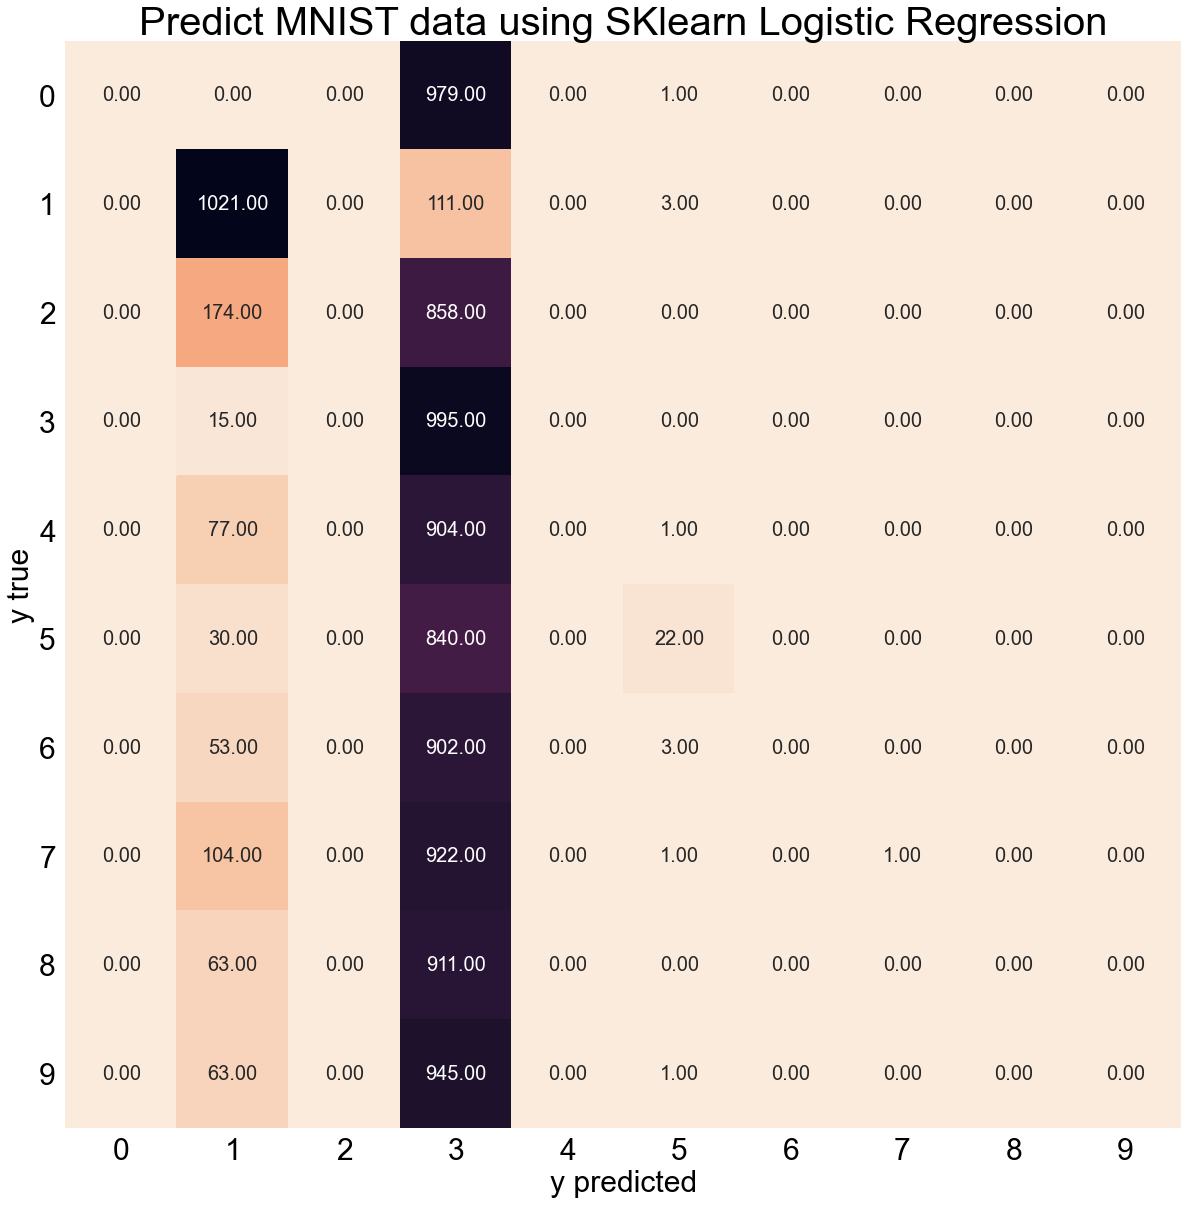

In [84]:
plt.figure(figsize = (20,20))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix, cmap="rocket_r", annot=True,annot_kws={"size": 20}, fmt=".2f", cbar=False)
plt.title("Predict MNIST data using SKlearn Logistic Regression", fontsize = 40, color= "black")
plt.xlabel("y predicted",fontsize=30, color= "black")
plt.ylabel("y true",fontsize = 30, color= "black")
plt.yticks(fontsize=30, rotation=0, color= "black")
plt.xticks(fontsize=30, rotation=0, color= "black")
plt.savefig("Results/MNIST_confMatrix_sklearn_sgd_logreg.png",dpi=100)
plt.show()

# Using the normal Logistic reg

In [71]:
clf_log = LogisticRegression(n_jobs=-1, verbose=1)

In [74]:
clf_log.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.3min finished


LogisticRegression(n_jobs=-1, verbose=1)

In [76]:
y_pred = clf_log.predict(X_test)

In [79]:
metrics.compute_accuracy(y_test.reshape(-1, 1),y_pred.reshape(-1, 1))

0.9257

In [81]:
y_test_ohe = ohe.transform(y_test.reshape(-1, 1)).toarray()
y_pred_ohe = ohe.transform(y_pred.reshape(-1, 1)).toarray()

In [86]:
conf_matrix2 = plot.compute_modified_confusion_matrix_nonorm(y_test_ohe,y_pred_ohe)

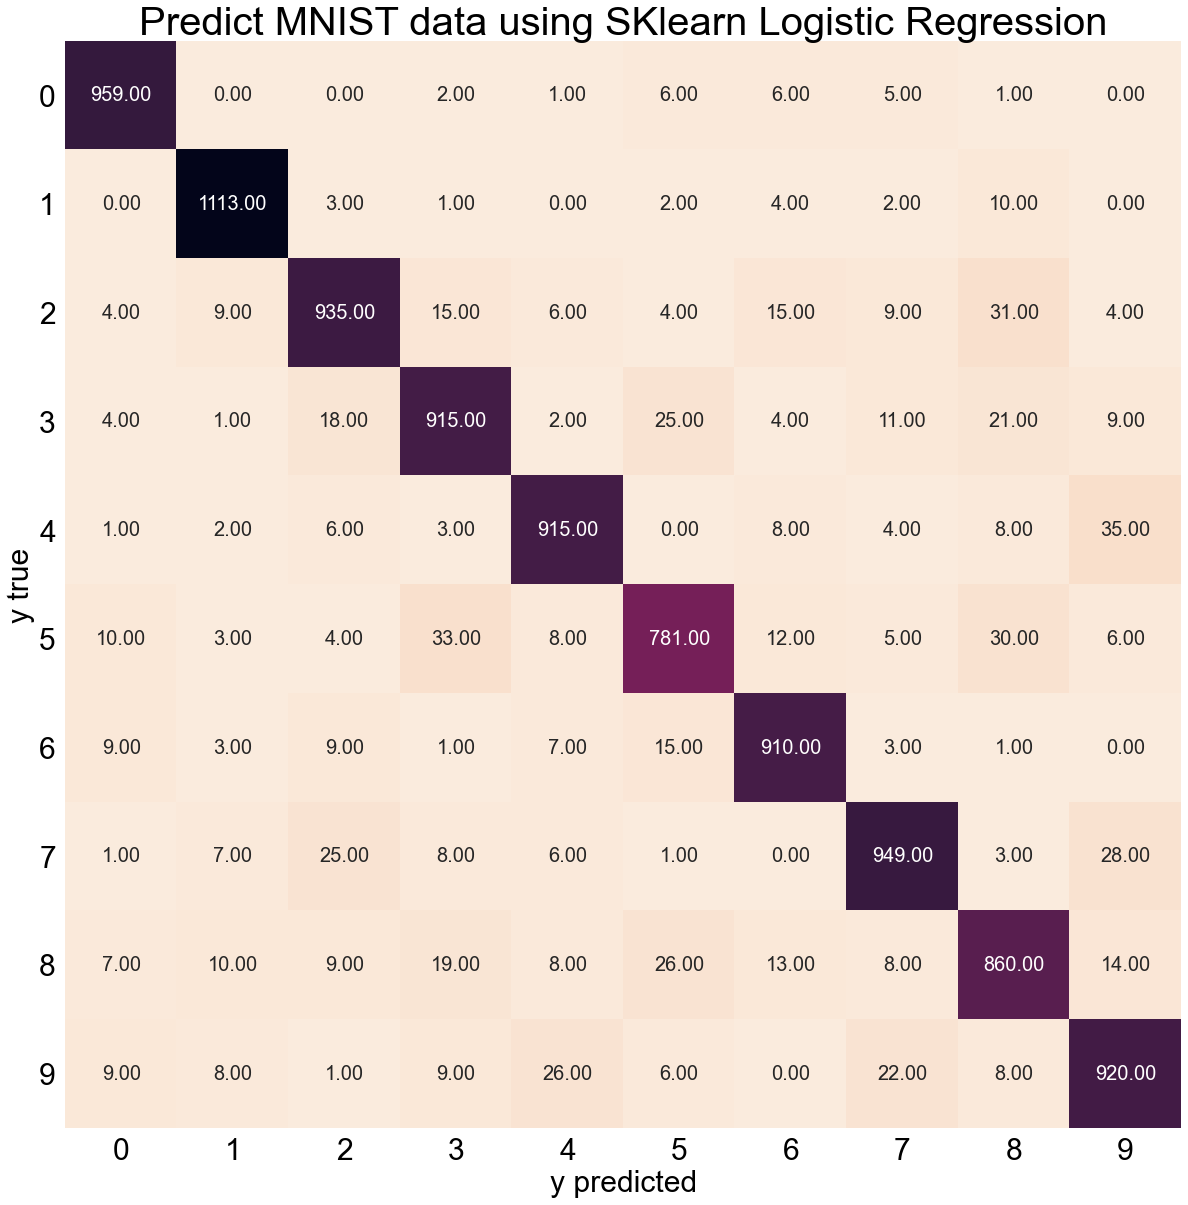

In [88]:
plt.figure(figsize = (20,20))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix2, cmap="rocket_r", annot=True,annot_kws={"size": 20}, fmt=".2f", cbar=False)
plt.title("Predict MNIST data using SKlearn Logistic Regression", fontsize = 40, color= "black")
plt.xlabel("y predicted",fontsize=30, color= "black")
plt.ylabel("y true",fontsize = 30, color= "black")
plt.yticks(fontsize=30, rotation=0, color= "black")
plt.xticks(fontsize=30, rotation=0, color= "black")
plt.savefig("Results/MNIST_confMatrix_sklearn_logreg.png",dpi=100)
plt.show()

# Using own algorithm: